In [1]:
import ISRAnalysis as an

Welcome to JupyROOT 6.14/04


In [2]:
binDef = "_FineCoarse"
detUnfold_muon_2016 = an.ISRAnalysis("2016", "muon", False, "matrix", \
                                     "Detector_Dressed_DR4PI_Fiducial", "Detector_Dressed_DR4PI", binDef)

ISRUnfold set!
ISRUnfold::setNomResMatrix set response matrix...
Rec_binName: Detector_Dressed_DR4PI_Fiducial/Pt_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Rec_Pt
Gen_binName: Detector_Dressed_DR4PI_Fiducial/Pt_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Gen_Pt
ISRUnfold::setMassBindEdges 
0 th mass bin edge: 40
1 th mass bin edge: 64
2 th mass bin edge: 81
3 th mass bin edge: 101
4 th mass bin edge: 200
5 th mass bin edge: 320
ISRUnfold::setNomResMatrix set response matrix...
Rec_binName: Detector_Dressed_DR4PI_Fiducial/Mass_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Rec_Mass
Gen_binName: Detector_Dressed_DR4PI_Fiducial/Mass_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Gen_Mass
ISRUnfold::setMassBindEdges 
ISRUnfold::setMassBindEdges massBinEdges already set.


Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 126 input bins and 70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #71
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 72 input bins and 72 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=72) input bins for nx=72 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #73


In [3]:
detUnfold_electron_2016 = an.ISRAnalysis("2016", "electron", False, "matrix", \
                                     "Detector_Dressed_DR4PI_Fiducial", "Detector_Dressed_DR4PI", binDef)

ISRUnfold set!
ISRUnfold::setNomResMatrix set response matrix...
Rec_binName: Detector_Dressed_DR4PI_Fiducial/Pt_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Rec_Pt
Gen_binName: Detector_Dressed_DR4PI_Fiducial/Pt_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Gen_Pt
ISRUnfold::setMassBindEdges 
0 th mass bin edge: 50
1 th mass bin edge: 64
2 th mass bin edge: 81
3 th mass bin edge: 101
4 th mass bin edge: 200
5 th mass bin edge: 320
ISRUnfold::setNomResMatrix set response matrix...
Rec_binName: Detector_Dressed_DR4PI_Fiducial/Mass_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Rec_Mass
Gen_binName: Detector_Dressed_DR4PI_Fiducial/Mass_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Gen_Mass
ISRUnfold::setMassBindEdges 
ISRUnfold::setMassBindEdges massBinEdges already set.


Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 126 input bins and 70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #71
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 72 input bins and 72 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=72) input bins for nx=72 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #73


In [4]:
sigma = detUnfold_muon_2016.checkMatrixCond()

Decompose(), successed? 1
Mass, Cond(): 3.58361

In [5]:
#sigma.Print()

In [6]:
detUnfold_muon_2016.checkMatrixCond("Pt")

<ROOT.TVectorT<double> object ("TVectorT<double>") at 0x747a958>

Decompose(), successed? 1
Pt, Cond(): 6.63329

In [7]:
# Nominal
detUnfold_muon_2016.setInputHist(False, False, None, "Detector")
detUnfold_muon_2016.setUnfoldBkgs(False, "Detector")
detUnfold_muon_2016.subFake() # Subract DY fake (out of fiducial volume at gen level)

In [8]:
#systematics = {"ID":["IdSFUp", "IdSFDown"], "ISO":["IsoSFUp", "IsoSFDown"], "TRG":["trgSFUp", "trgSFDown"], \
#              "PU":["PUUp", "PUDown"], "Scale":["ScaleABUp", "ScaleABDown"], "AlphaS":["AlphaSUp", "AlphaSDown"]}
#              #"Fake":["FakeUp", "FakeDown"]}
    
systematics = {"ID":["IdSFUp", "IdSFDown"], "TRG":["trgSFUp", "trgSFDown"], \
              "PU":["PUUp", "PUDown"], "Scale":["ScaleABUp", "ScaleABDown"], "AlphaS":["AlphaSUp", "AlphaSDown"]}

for sysName, postfixs in systematics.items():
    for postfix in postfixs:
        detUnfold_muon_2016.setSystematics(sysName, postfix)

for sysName, postfixs in systematics.items():
    for postfix in postfixs:
        print(sysName + " " + postfix)
        detUnfold_muon_2016.setInputHist(False, False, None, "Detector", True, sysName, postfix)
        detUnfold_muon_2016.setUnfoldBkgs(True, "Detector", sysName, postfix)

        detUnfold_muon_2016.subFake(True, sysName,postfix)

ID IdSFUp
ID IdSFDown
TRG trgSFUp
TRG trgSFDown
PU PUUp
PU PUDown
Scale ScaleABUp
Scale ScaleABDown
AlphaS AlphaSUp
AlphaS AlphaSDown


Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 126 input bins and 70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #71
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 72 input bins and 72 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=72) input bins for nx=72 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #73
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 126 input bins and 70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding 

In [9]:
#detUnfold_electron_2016.setFromPrevUnfold(detUnfold_muon_2016.getISRUnfold())

In [10]:
detUnfold_muon_2016.doUnfold()
detUnfold_muon_2016.doUnfold(True)

Do systematic unfold!
Unfold for AlphaS systematic.
2 systematic variation exist.
posfix: AlphaSUp
posfix: AlphaSDown
Unfold for ID systematic.
2 systematic variation exist.
posfix: IdSFUp
posfix: IdSFDown
Unfold for PU systematic.
2 systematic variation exist.
posfix: PUUp
posfix: PUDown
Unfold for Scale systematic.
2 systematic variation exist.
posfix: ScaleABUp
posfix: ScaleABDown
Unfold for TRG systematic.
2 systematic variation exist.
posfix: trgSFUp
posfix: trgSFDown


Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: 

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M1.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M2.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M3.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M4.png has been created


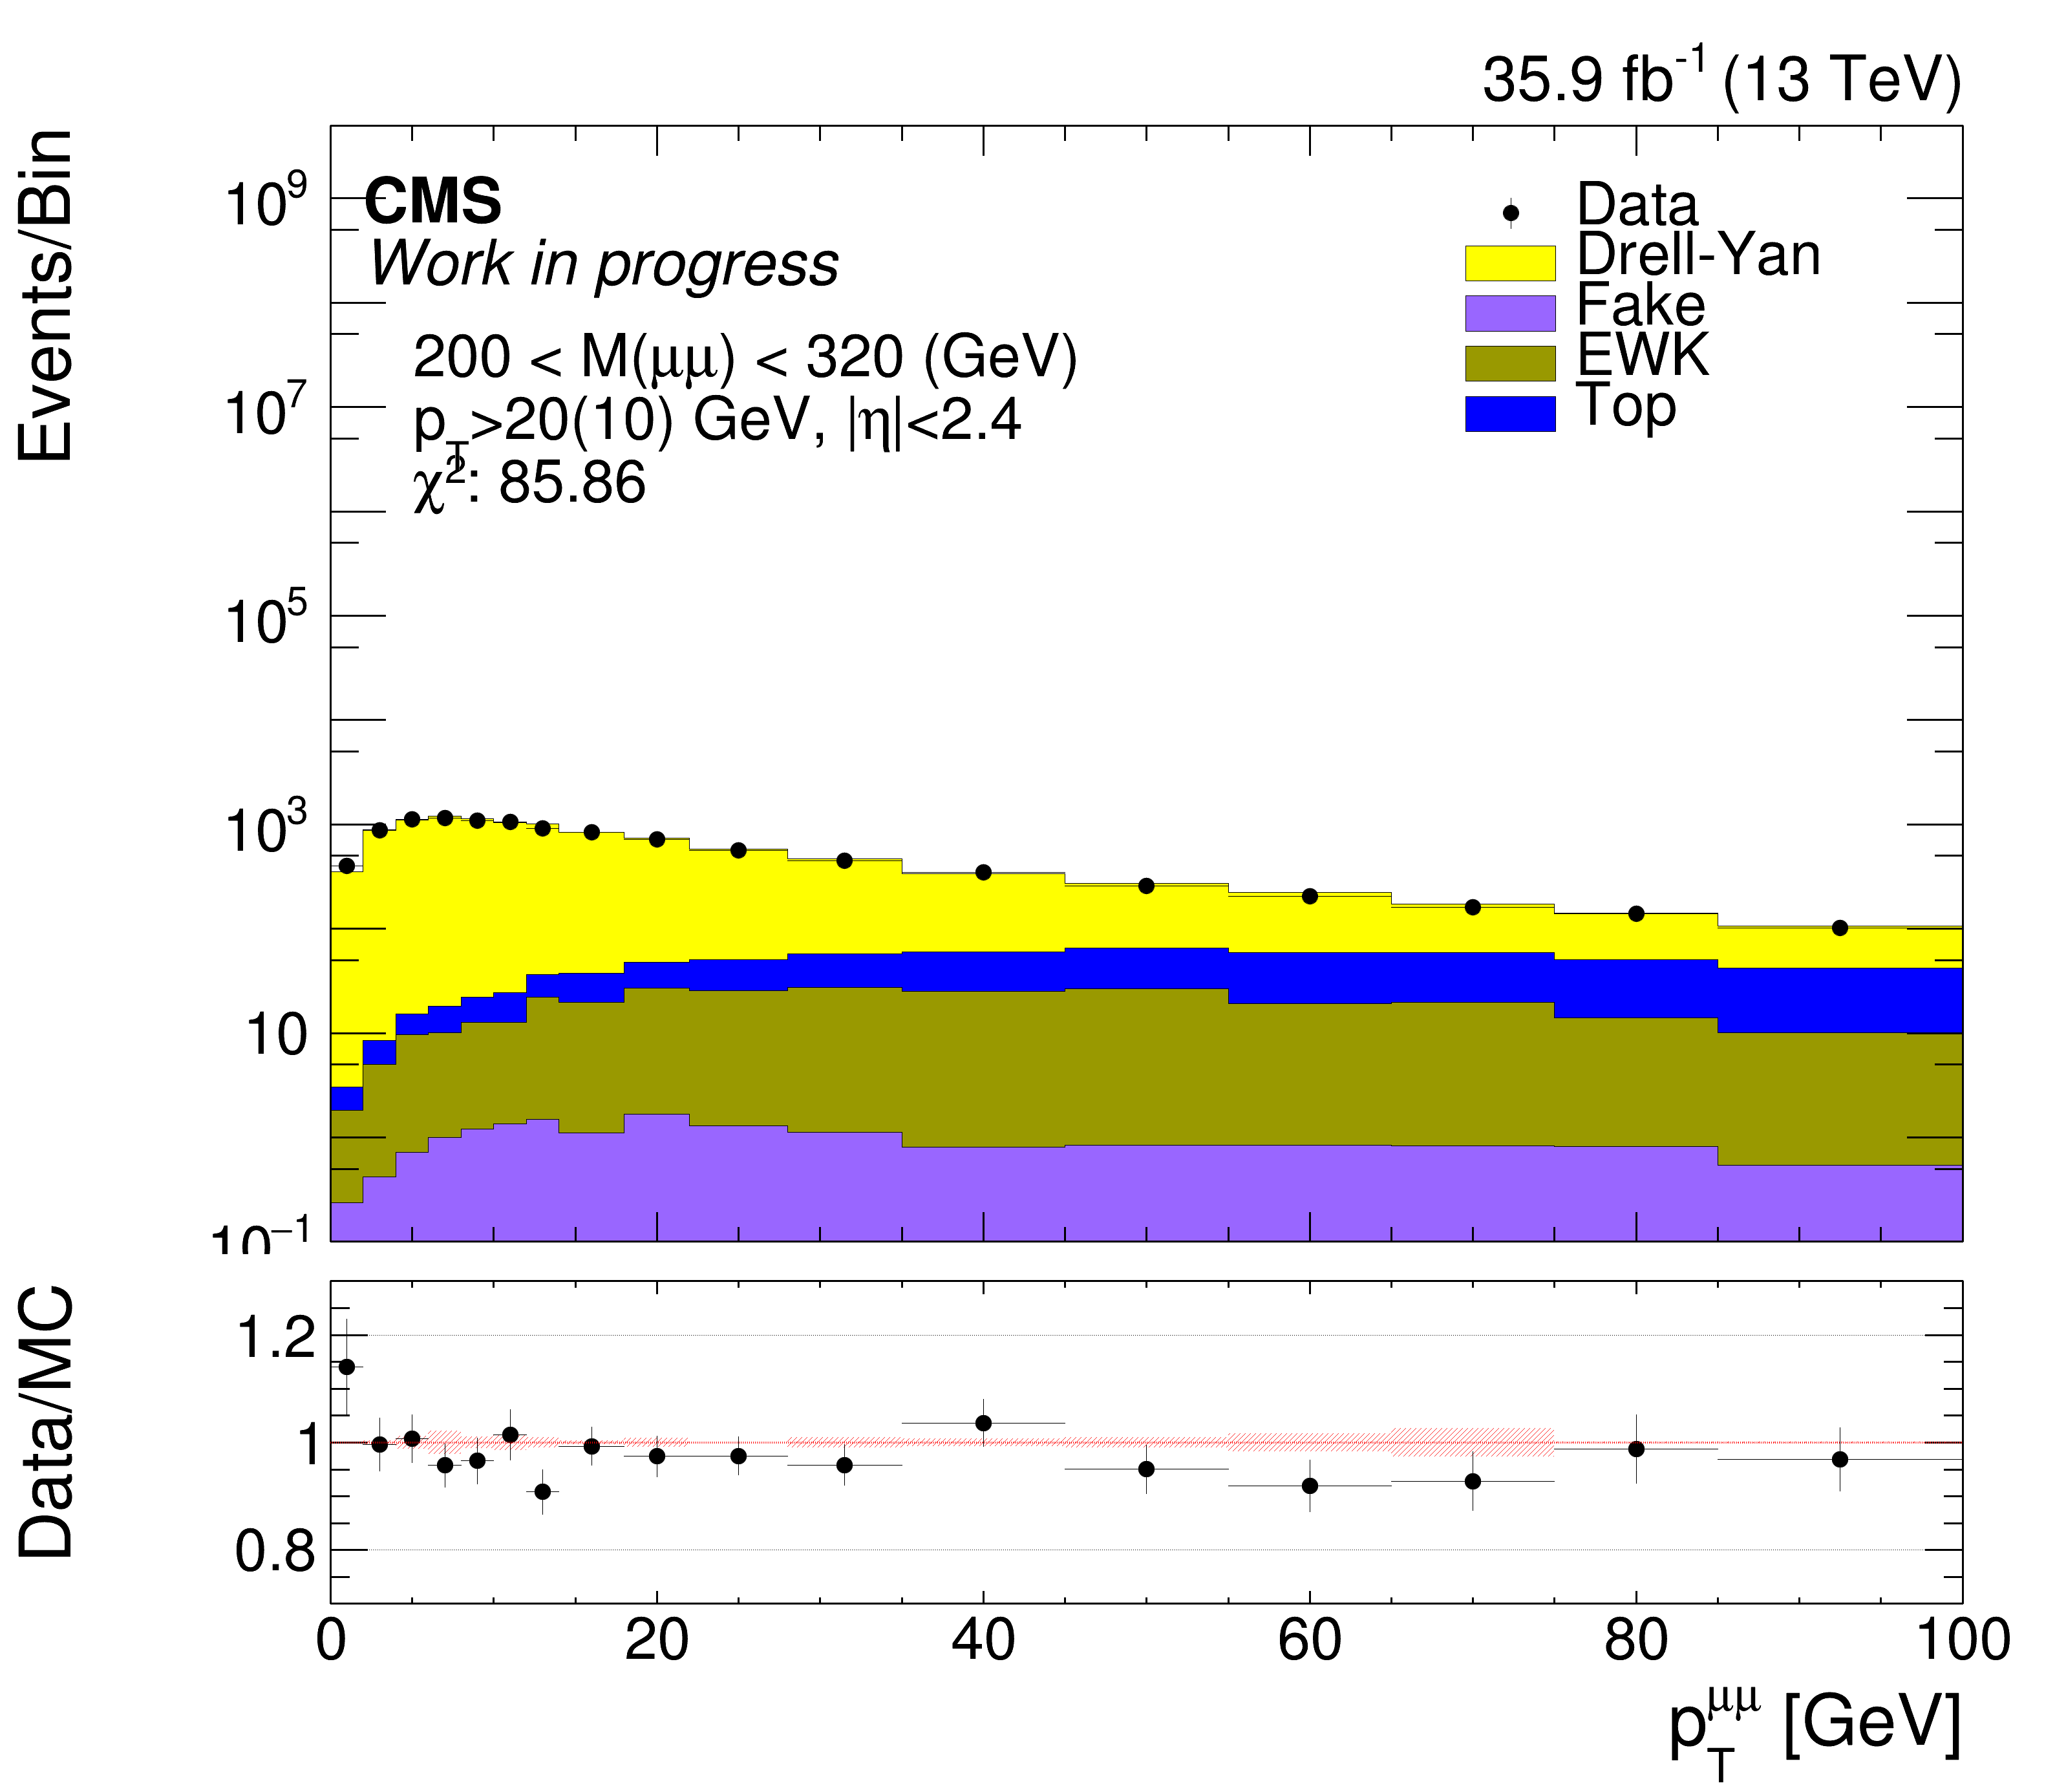

In [25]:
# 
for massBin in range(5):
    detUnfold_muon_2016.drawDetPlot("Pt"+binDef, "Detector", "pt[UO];mass[UOC"+str(massBin)+"]", True, "PU", "DiPt_M"+str(massBin), massBin, True)

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)


Info in <TCanvas::Print>: png file detector_Mass_FineCoarse.png has been created


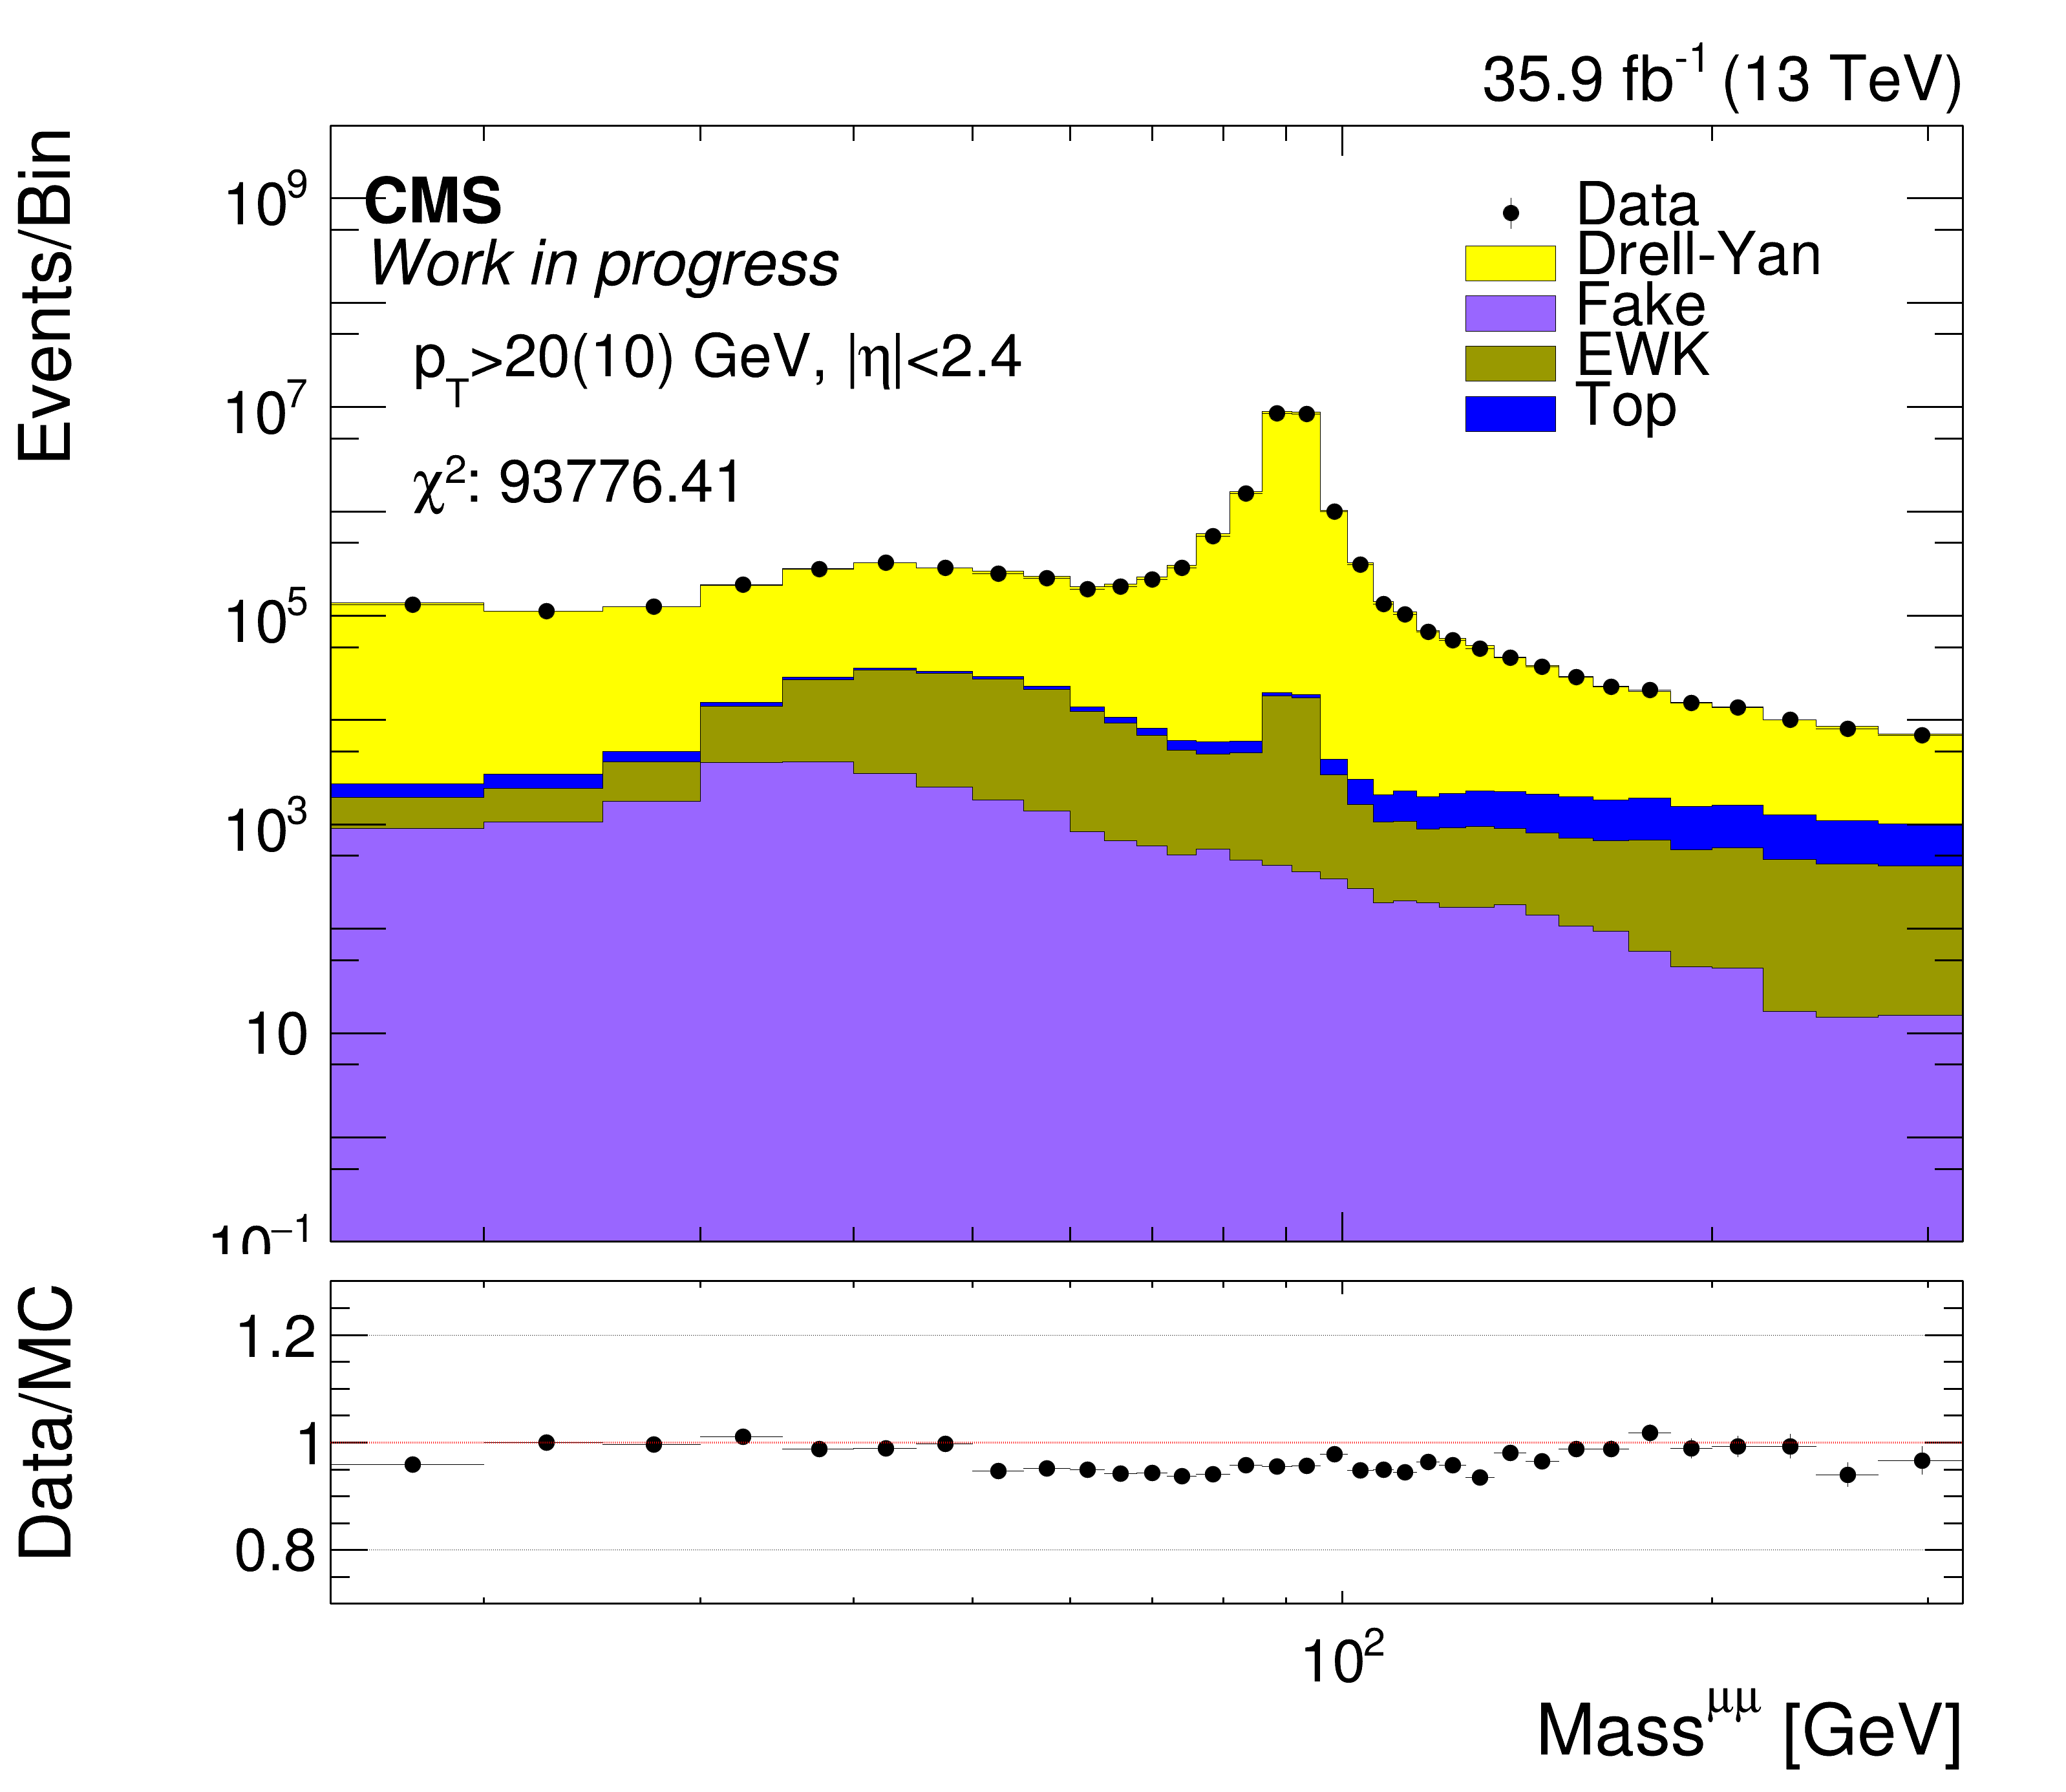

In [12]:
detUnfold_muon_2016.drawDetPlot("Mass"+binDef, "Detector", "mass[UO];pt[UOC0]", True, "")

In [13]:
#for massBin in range(0,5):
#    detUnfold_muon_2016.drawDetPlot("Pt_1D", "Detector_M_"+str(massBin), "", True, "AlphaS", "DiPt_M"+str(massBin)+"1GeVBin", massBin)

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 57913.9


Info in <TCanvas::Print>: png file unfolded_Mass.png has been created


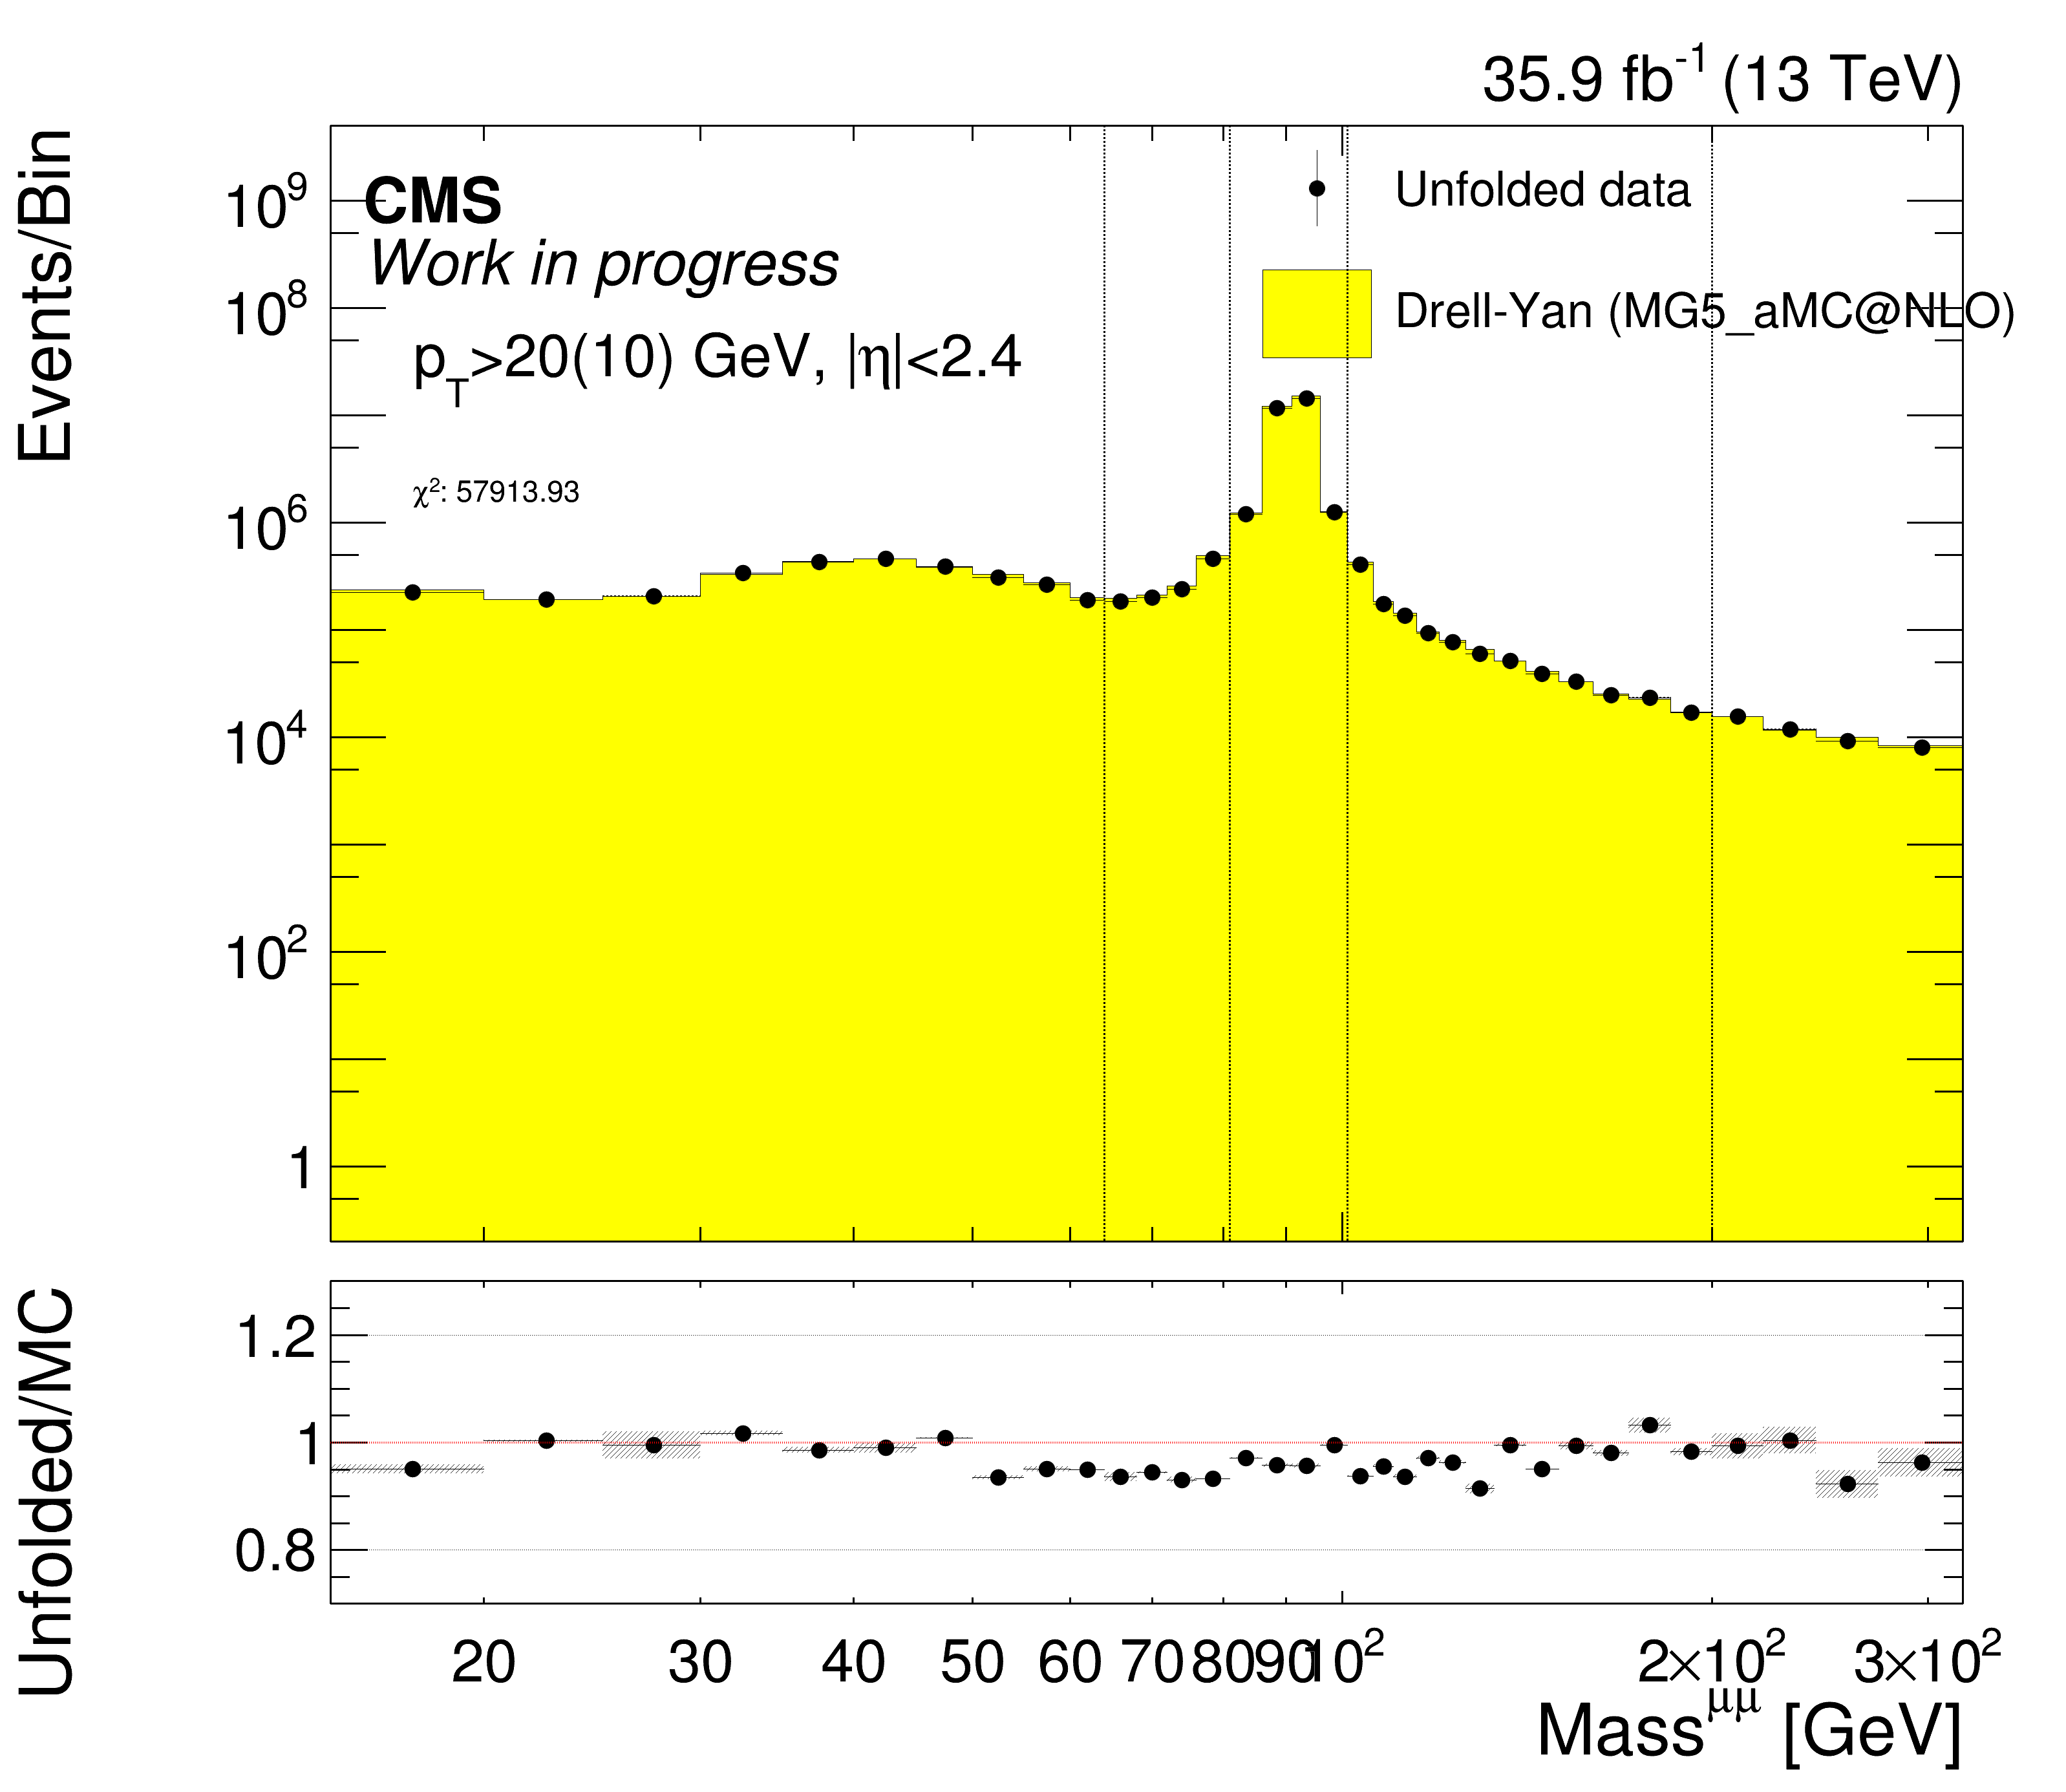

In [14]:
detUnfold_muon_2016.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, "Scale")

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 512.119
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 1369.97
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 25289.2
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 949.833
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 30.447


Info in <TCanvas::Print>: png file UnfDiPt_M0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M1.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M2.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M3.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M4.png has been created


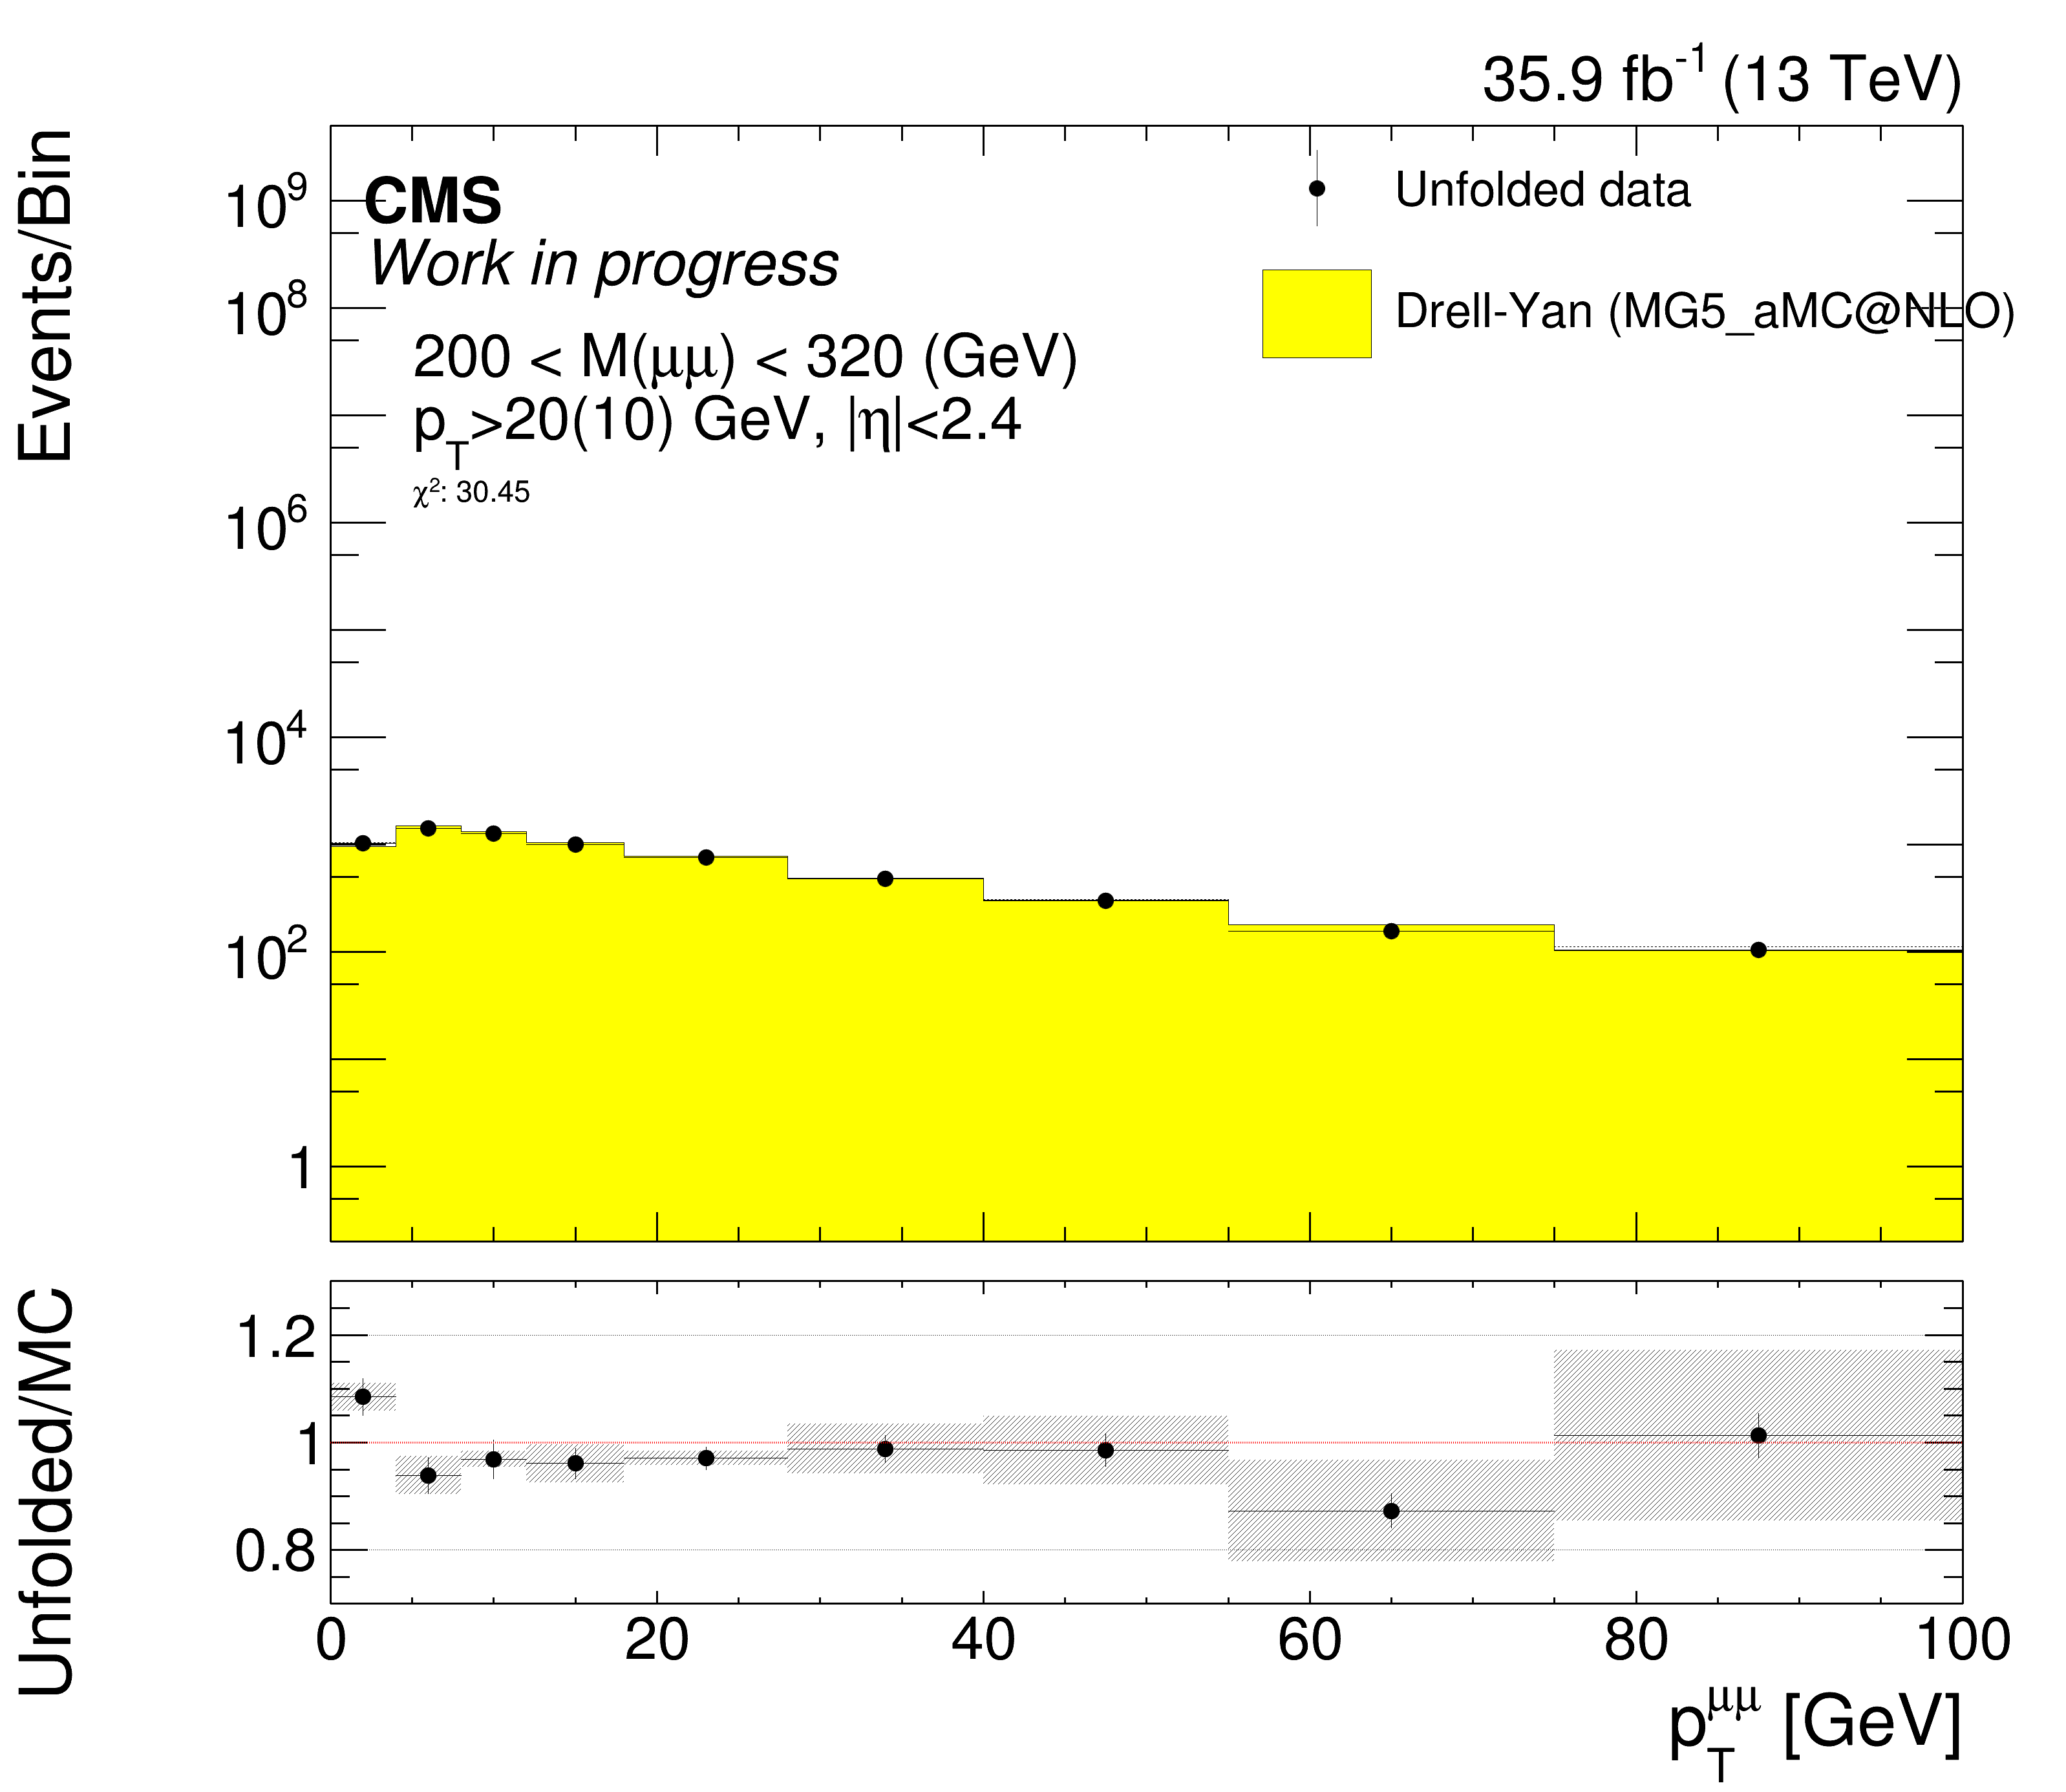

In [15]:
for massBin in range(5):
    detUnfold_muon_2016.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "Scale", "UnfDiPt_M"+str(massBin), massBin, True)

In [16]:
detUnfold_muon_2016.setMeanValues()

ISRUnfold::setMeanMass()   Save mean of dilepton...
ISRUnfold::setMeanPt()   Save mean of dilepton momentum...


In [17]:
detUnfold_muon_2016.setSysMeanValues()

ISRUnfold::setSysMeanMass()   Save mean of dilepton...
Unfold for AlphaS systematic.
2 systematic variation exist.
AlphaS AlphaSUp 50.3875
AlphaS AlphaSUp 73.8209
AlphaS AlphaSUp 91.2559
AlphaS AlphaSUp 117.827
AlphaS AlphaSUp 241.222
AlphaS AlphaSDown 50.3862
AlphaS AlphaSDown 73.8167
AlphaS AlphaSDown 91.2556
AlphaS AlphaSDown 117.836
AlphaS AlphaSDown 241.235
Unfold for ID systematic.
2 systematic variation exist.
ID IdSFUp 50.394
ID IdSFUp 73.8237
ID IdSFUp 91.256
ID IdSFUp 117.791
ID IdSFUp 241.218
ID IdSFDown 50.3789
ID IdSFDown 73.8146
ID IdSFDown 91.2556
ID IdSFDown 117.869
ID IdSFDown 241.238
Unfold for PU systematic.
2 systematic variation exist.
PU PUUp 50.3907
PU PUUp 73.8136
PU PUUp 91.2568
PU PUUp 117.819
PU PUUp 241.212
PU PUDown 50.3827
PU PUDown 73.8242
PU PUDown 91.2547
PU PUDown 117.843
PU PUDown 241.257
Unfold for Scale systematic.
2 systematic variation exist.
Scale ScaleABUp 50.3923
Scale ScaleABUp 73.8243
Scale ScaleABUp 91.2554
Scale ScaleABUp 117.857
Scale Scal

In [18]:
detUnfold_muon_2016.setSysError()

Systematic: AlphaS 0 mass bin 
mass: 0.0010096 pt: 0.0106043
Systematic: AlphaS 1 mass bin 
mass: 0.00240837 pt: 0.00864436
Systematic: AlphaS 2 mass bin 
mass: 0.000237164 pt: 0.00178186
Systematic: AlphaS 3 mass bin 
mass: 0.00568149 pt: 0.0136797
Systematic: AlphaS 4 mass bin 
mass: 0.00672999 pt: 0.0653839
Systematic: ID 0 mass bin 
mass: 0.00756886 pt: 0.0133494
Systematic: ID 1 mass bin 
mass: 0.0045653 pt: 0.0176463
Systematic: ID 2 mass bin 
mass: 0.000197149 pt: 0.0278313
Systematic: ID 3 mass bin 
mass: 0.03892 pt: 0.0287212
Systematic: ID 4 mass bin 
mass: 0.0101274 pt: 0.0405934
Systematic: PU 0 mass bin 
mass: 0.0042001 pt: 0.00992147
Systematic: PU 1 mass bin 
mass: 0.00552119 pt: 0.0145079
Systematic: PU 2 mass bin 
mass: 0.0010923 pt: 0.00433448
Systematic: PU 3 mass bin 
mass: 0.0134959 pt: 0.00425434
Systematic: PU 4 mass bin 
mass: 0.0295256 pt: 0.0047984
Systematic: Scale 0 mass bin 
mass: 0.00751133 pt: 0.0735367
Systematic: Scale 1 mass bin 
mass: 0.00662177 pt: 0

In [19]:
detUnfold_muon_2016.setTotSysError()

In [20]:
gr_2016_muon_det_unfold =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDetUnf")
gr_2016_muon_det_unfold_sys =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDetUnf",True,True)

In [21]:
gr_2016_muon_det =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDet", False)

20.1 fb^{-1} (13 TeV)


Info in <TCanvas::Print>: png file Run2_detector.png has been created


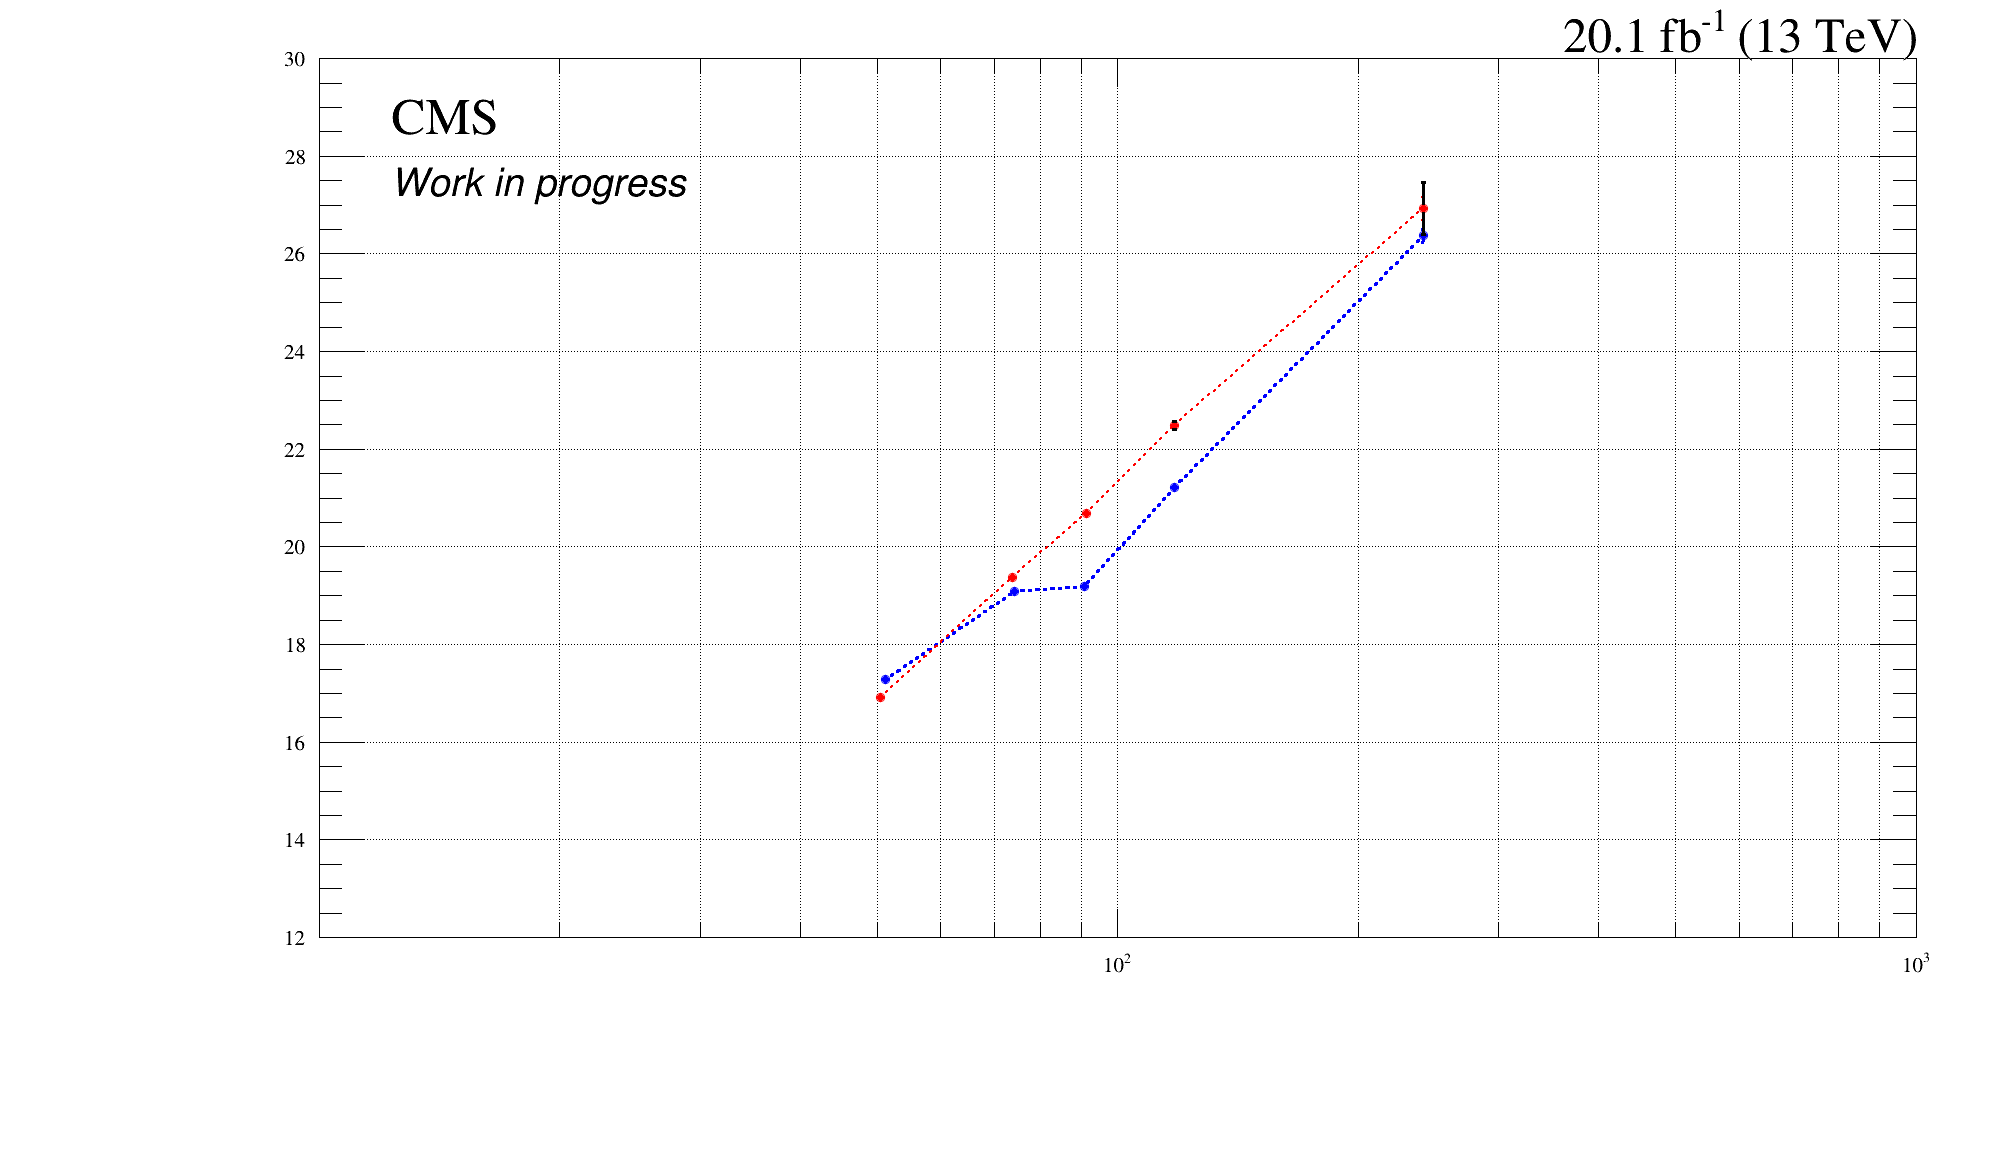

In [22]:
import pyScripts.tdrStyle as tdrStyle
import pyScripts.CMS_lumi as CMS_lumi
import ROOT as rt
markerSize = 1.2

tdrStyle.setTDRStyle()
rt.gStyle.SetOptFit(0)

c_PtVsMass_detector = rt.TCanvas("PtVsMass_detector","PtVsMass_detector", 2000, 1200)
c_PtVsMass_detector.SetGridx()
c_PtVsMass_detector.SetGridy()
c_PtVsMass_detector.SetLogx()
c_PtVsMass_detector.SetBottomMargin(0.2)

gr_2016_muon_det.SetTitle("2016, 2017, 2018 Detector level")
gr_2016_muon_det.Draw("APL")
gr_2016_muon_det.GetYaxis().SetRangeUser(12., 30.)
gr_2016_muon_det.GetXaxis().SetLimits(10., 1000.)
gr_2016_muon_det.SetMarkerStyle(20)
gr_2016_muon_det.SetLineStyle(2)
gr_2016_muon_det.SetMarkerSize(markerSize)
gr_2016_muon_det.SetMarkerColor(rt.kBlue)
gr_2016_muon_det.SetLineColor(rt.kBlue)

gr_2016_muon_det_unfold.Draw("PL SAME")
gr_2016_muon_det_unfold.SetLineWidth(2)
gr_2016_muon_det_unfold.SetMarkerColor(rt.kRed)
gr_2016_muon_det_unfold.SetLineStyle(2)
gr_2016_muon_det_unfold.SetLineColor(rt.kRed)

gr_2016_muon_det_unfold_sys.Draw("E SAME")
gr_2016_muon_det_unfold_sys.SetLineWidth(3)
gr_2016_muon_det_unfold_sys.SetMarkerColor(rt.kBlack)
gr_2016_muon_det_unfold_sys.SetLineColor(rt.kBlack)

CMS_lumi.extraText = "Work in progress"
CMS_lumi.CMS_lumi(c_PtVsMass_detector, 4, 11)
c_PtVsMass_detector.Draw()
c_PtVsMass_detector.SaveAs("Run2_detector.png")